<h2>Importe</h2>

In [1]:
import pickle

import numpy
import pandas as pd
import numpy as np
import os
import src.data as data
import torch
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import math


<h2>Methoden</h2>

In [2]:
#Straight up stolen from main.py
def calc_roc_auc(gts, probs):
    try:
        auc = metrics.roc_auc_score(gts, probs)
        if np.isnan(auc):
            auc = 0

        return auc
    except:
        print("except")
        return 0


In [3]:
def map_value(value):
    if value >= 0.5:
        return 1
    else:
        return 0

<h2>Laden der gespeicherten Daten und der Modelle</h2>

In [4]:
data_list = []
with open(r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\data_plot\test_data", "rb") as input:
    while True:
        try:
            x = pickle.load(input)
        except EOFError:
            break
        data_list.append(x)



In [7]:
len(data_list)

5

In [5]:
model_list = []
dir = r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\model"
for file in os.listdir(dir):
    filename = os.fsdecode(file)
    if "_15" in filename:
        model_list.append(torch.load(dir + "\\" + file))


In [9]:
len(model_list)

5

In [6]:
lowest_len = math.inf
for ds in data_list:
    if len(ds["x_test_seq"]) < lowest_len:
        lowest_len = len(ds["x_test_seq"])


In [11]:
lowest_len

183

In [59]:
(data_list[0]["x_test_seq"][5:10])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [8]:
def getPrefixLength(seq, sample):
    counter = 0
    rowCounter = -1
    lastRow = None
    actualPrefixRows = 0
    for matrix in seq[sample,:,:]:
        #print(matrix)
        rowCounter += 1

        notZero = False

        for x in matrix:
            x = float(x)
            if x != 0:
                notZero = True
                break

        if notZero:
            lastRow = matrix
            actualPrefixRows = rowCounter

    if lastRow != None:
        for entry in lastRow:
            if entry == 0:
                counter += 1

            if entry != 0:
                counter += 1
                break

    #print(actualPrefixRows)
    #print(counter)
    #print(rowCounter)
    #print(lastRow)

    return counter + (actualPrefixRows * len(lastRow))

In [9]:
getPrefixLength((torch.from_numpy(data_list[0]["x_test_seq"])), 23)
torch.from_numpy(data_list[0]["x_test_seq"])[51,:,:]
#torch.from_numpy(data_list[0]["x_test_seq"])[0]

tensor([[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5404, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5404, 0.2261, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.00

In [10]:
def getPrefixDictionary(seq):
    samples = seq.shape[0]
    print(samples)

    mapList = []
    uniquePrefixSizes = []
    for t in range(0, samples):
        indexPrefixSizeMap = {"index" : t, "prefixSize" : getPrefixLength(seq, t)}
        #print("sample " + str(t) + ": " + str(getPrefixLength(seq, t)))
        mapList.append(indexPrefixSizeMap)
        uniquePrefixSizes.append(getPrefixLength(seq, t))

    uniquePrefixSizes = set(uniquePrefixSizes)
    #print(uniquePrefixSizes)

    prefixDictionaryList = []

    for prefixSize in uniquePrefixSizes:
        prefixDictionary = {}
        prefixDictionary["prefixSize"] = prefixSize
        prefixDictionary["indizes"] = []
        for entry in mapList:
            if entry["prefixSize"] == prefixSize:
                prefixDictionary["indizes"].append(entry["index"])
        prefixDictionaryList.append(prefixDictionary)

    #print(prefixDictionary)
    return prefixDictionaryList


In [12]:
print(getPrefixDictionary((torch.from_numpy(data_list[0]["x_test_seq"]))))

183
[{'prefixSize': 129, 'indizes': [8, 24, 41, 55, 70, 102, 122, 144, 164, 177]}, {'prefixSize': 257, 'indizes': [32]}, {'prefixSize': 4, 'indizes': [0, 16, 33, 44, 47, 62, 72, 80, 88, 94, 106, 114, 125, 133, 136, 151, 156, 169]}, {'prefixSize': 145, 'indizes': [9, 25, 42, 56, 71, 103, 123, 145, 165, 178]}, {'prefixSize': 21, 'indizes': [1, 17, 34, 45, 48, 63, 73, 81, 89, 95, 107, 115, 126, 134, 137, 152, 157, 170]}, {'prefixSize': 161, 'indizes': [10, 26, 43, 57, 104, 124, 146, 166, 179]}, {'prefixSize': 34, 'indizes': [74]}, {'prefixSize': 38, 'indizes': [2, 18, 35, 46, 49, 64, 82, 90, 96, 108, 116, 127, 135, 138, 153, 158, 171]}, {'prefixSize': 177, 'indizes': [11, 27, 58, 105, 147, 167, 180]}, {'prefixSize': 50, 'indizes': [50, 75, 109, 139]}, {'prefixSize': 51, 'indizes': [19, 36]}, {'prefixSize': 49, 'indizes': [65, 91, 117, 154, 159]}, {'prefixSize': 55, 'indizes': [3, 83, 97, 128, 172]}, {'prefixSize': 193, 'indizes': [12, 28, 59, 148, 168, 181]}, {'prefixSize': 65, 'indizes':

In [13]:
getPrefixLength((torch.from_numpy(data_list[0]["x_test_seq"])), 10)

161

In [21]:
result = []

for model, dataset in zip(model_list,data_list):
    values = {"model" : dataset["fold"], "data" : []}

    seq = torch.from_numpy(dataset["x_test_seq"])
    stat = torch.from_numpy(dataset["x_test_stat"])
    label = torch.from_numpy(dataset["label"])

    prefixLengthDictList = getPrefixDictionary(seq)

    for prefixLengthDict in prefixLengthDictList:
        performancePrefixDict = {"PrefixLength" : prefixLengthDict["prefixSize"]}

        prefixSeq = seq[prefixLengthDict["indizes"],:,:]
        prefixStat = stat[prefixLengthDict["indizes"],:]
        prefixLabel = label[prefixLengthDict["indizes"]]

        model.eval()
        with torch.no_grad():

            prediction = torch.sigmoid(model.forward(prefixSeq, prefixStat))
            prediction = [map_value([0][0]) for pred in prediction]
            #print((prediction))
            #print((prefixLabel))

            performancePrefixDict["AUC"] = calc_roc_auc(prefixLabel, prediction)

            #rocauc = metrics.roc_auc_score(prefixLabel, prediction)
            #print(rocauc)
            #performancePrefixDict["AUC"] = rocauc

            values["data"].append(performancePrefixDict)

    result.append(values)


183
129
except
257
except
4
145
except
21
161
except
34
except
38
177
except
50
except
51
except
49
except
55
193
except
65
66
except
72
except
209
except
82
except
81
225
except
98
except
97
113
241
except
114
except
194
129
except
4
145
except
21
33
except
161
except
38
49
except
177
except
50
55
except
65
except
66
193
except
67
except
72
except
81
82
except
209
except
83
except
97
except
225
except
98
except
113
except
241
except
185
129
except
257
except
4
except
145
except
273
except
17
except
21
except
161
except
289
except
35
except
33
except
34
except
38
except
177
except
50
except
51
except
49
except
305
except
55
except
65
except
193
except
66
except
321
except
72
except
81
except
209
except
82
except
337
except
97
except
225
except
98
except
113
except
241
except
197
129
257
except
4
145
except
273
except
21
161
except
289
except
38
49
50
except
177
except
51
except
305
except
55
except
56
except
65
193
except
67
except
321
except
71
except
72
except
81
209
except
83
except

   PrefixLength  AUC
2             4  0.5
4            21  0.5
6            34    0
7            38  0.5
11           49    0
9            50    0
10           51    0
12           55  0.5
14           65  0.5
15           66    0
16           72    0
19           81  0.5
18           82    0
22           97  0.5
21           98    0
23          113  0.5
0           129    0
3           145    0
5           161    0
8           177    0
13          193    0
17          209    0
20          225    0
24          241    0
1           257    0
   PrefixLength  AUC
1             4  0.5
3            21  0.5
4            33    0
6            38  0.5
7            49    0
9            50  0.5
10           55    0
11           65    0
12           66  0.5
14           67    0
15           72    0
16           81  0.5
17           82    0
19           83    0
20           97    0
22           98    0
23          113    0
0           129    0
2           145    0
5           161    0
8           1

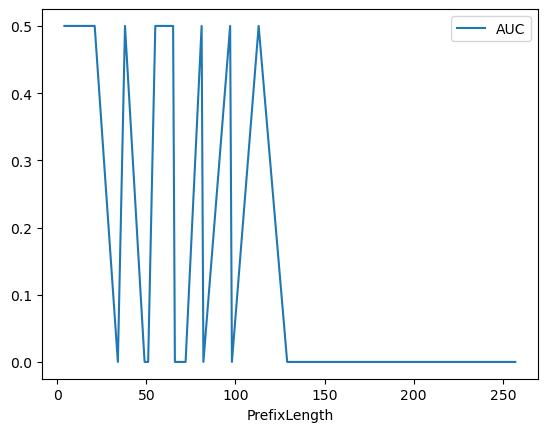

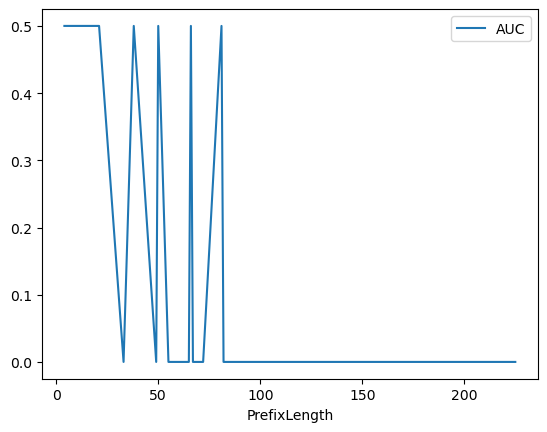

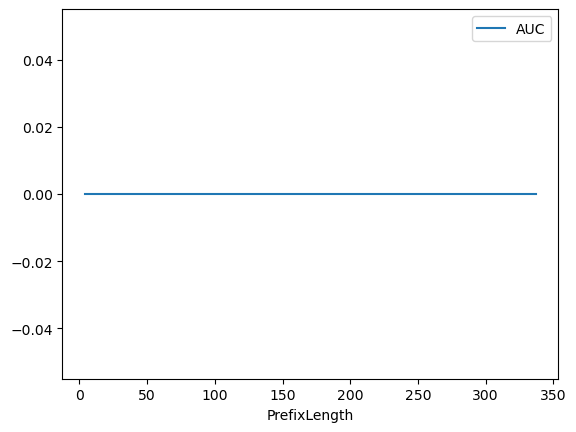

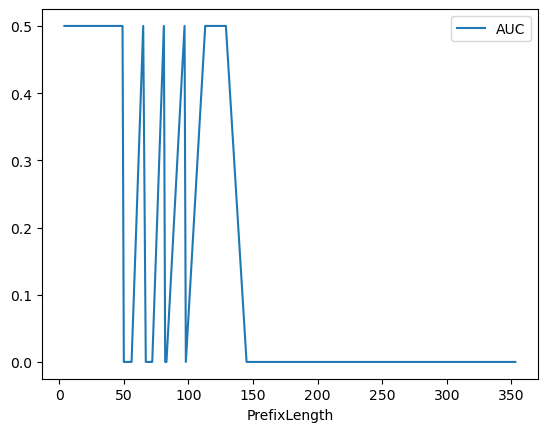

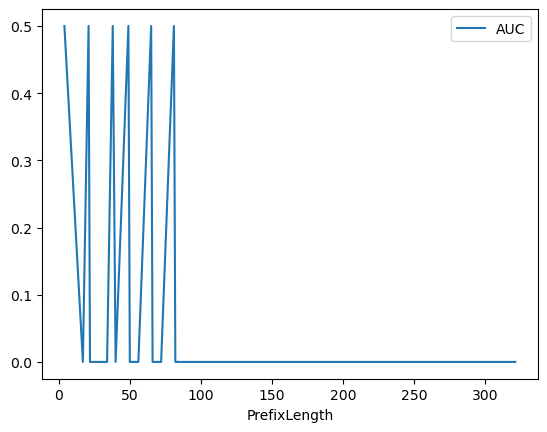

In [32]:

for values in result:

    data = values["data"]
    df = pd.DataFrame(columns= ["PrefixLength", "AUC"])
    for i in range(0,len(data) -1):
        x = (data[i]["PrefixLength"])
        y = (data[i]["AUC"])
        df.loc[i] = (x,y)
        #print(data[i]["PrefixLength"])


    #plt.plot(x, y, label = values["model"])
    df = df.sort_values(by=["PrefixLength"])
    df.plot(x = "PrefixLength", y = "AUC")
    print(df)
plt.legend()
plt.show()